<a href="https://colab.research.google.com/github/darpankhanna/Sentiment-Analyzer/blob/main/Twitter_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tweepy,re
from textblob import TextBlob
import matplotlib.pyplot as plt
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [2]:
# authentication
consumerKey = 'nAfAiljzt8Ntd1oatjYU2uvKc'
consumerSecret = 'JBJahC7nKS4q853V0vodZ8buaYGHwySv6u5XFm52dlownOqTRm'
accessToken = '4880646753-8TzBk1UEjuvXEXR2XL7uJ2ZFMRZnwNrDOioUHI9'
accessTokenSecret = 'CjAas3cB7A9OW7SJFA6SOkyfgv61MyN59W0g47ZSqBL2b'
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

In [3]:
# input for term to be searched and how many tweets to search
searchTerm = input("Enter Keyword/Tag to search about: ")
NoOfTerms = int(input("Enter how many tweets to search: "))

tweets = []
tweetText = []
# searching for tweets
tweets = tweepy.Cursor(api.search, q=searchTerm+" -filter:retweets", lang = "en").items(NoOfTerms)

Enter Keyword/Tag to search about: Olympics
Enter how many tweets to search: 70


In [4]:
tweet_list = [tweet.text for tweet in tweets]
tweet_df = pd.DataFrame(tweet_list)
tweet_df

,0
0,Hon. Brandon Alex Kintu: In these 100 days of ...
1,A broadcast boycott is the last chance to moun...
2,The 2012 Olympics will be a decade ago next ye...
3,@Chuckles152 1984 Summer Olympics by far! Carl...
4,"@OliverTonder Yeah I'm on it, didn't cancel it..."
...,...
65,@Tommowa48603059 The Olympics guy?
66,@ofitz75 @zDoodFCB Imagine every 4 years there...
67,"PM Modi asks PR Sreejesh, you must have learnt..."
68,"PM Modi asks PR Sreejesh, you must have learnt..."


In [5]:
def clean_data(text):
    return ' '.join(re.sub("(@[a-zA-Z0-9]+)|([^0-9A-Za-z])|(https://[\w.]+/[\w]+)", " ", text).split())

tweet_df['cleaned_data'] = tweet_df[0].apply(clean_data)

In [6]:
tweet_df.head()

,0,cleaned_data
0,Hon. Brandon Alex Kintu: In these 100 days of ...,Hon Brandon Alex Kintu In these 100 days of pa...
1,A broadcast boycott is the last chance to moun...,A broadcast boycott is the last chance to moun...
2,The 2012 Olympics will be a decade ago next ye...,The 2012 Olympics will be a decade ago next year
3,@Chuckles152 1984 Summer Olympics by far! Carl...,1984 Summer Olympics by far Carl Lewis winning...
4,"@OliverTonder Yeah I'm on it, didn't cancel it...",Yeah I m on it didn t cancel it when I got GCN...


In [7]:
def drop_numbers(list_text):
    list_text_new = []
    for i in list_text:
        if not re.search('\d', i):
            list_text_new.append(i)
    return ''.join(list_text_new)

tweet_df['cleaned_data'] = tweet_df['cleaned_data'].apply(drop_numbers)

In [8]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [9]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [10]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
lemmatizer = WordNetLemmatizer()
def lemmatise(text):
    text_tokens = word_tokenize(text)
    text_lemm = [lemmatizer.lemmatize(word) for word in text_tokens]
    return ' '.join(text_lemm)

tweet_df['cleaned_data'] = tweet_df['cleaned_data'].apply(lemmatise)

In [12]:
tweet_df['cleaned_data'].values

array(['Hon Brandon Alex Kintu In these day of parliament we had the Olympics where we won medal and Parliament pa',
       'A broadcast boycott is the last chance to mount serious resistance against the Beijing Olympic Games Beijing',
       'The Olympics will be a decade ago next year',
       'Summer Olympics by far Carl Lewis winning becoming st Gymnast winning A',
       'Yeah I m on it didn t cancel it when I got GCN because they had the Olympics and very glad I kept it',
       'Trent Z is gay amp dripping wet which would ameliorate a lot of that vote that went to Zali in',
       'I got just a little bit into volleyball since the Olympics haha a I watched the semi and the final I d',
       'exo solo fandom fighting over who got the le promotion the oppression olympics no wonder why yall being called',
       'is there like an olympics for singer bc i want to sign dokyeom up',
       'How is the born in a summer Olympics year v born in a Commonwealth Games year count going',
  

In [13]:
def remove_stopword(text):
    text_tokens = word_tokenize(text)
    tokens = [word for word in text_tokens if not word in set(stopwords.words('english'))]
    tokens_text = ' '.join(tokens)
    return tokens_text

tweet_df['cleaned_data'] = tweet_df['cleaned_data'].apply(remove_stopword)

In [14]:
tweet_df['cleaned_data'].values

array(['Hon Brandon Alex Kintu In day parliament Olympics medal Parliament pa',
       'A broadcast boycott last chance mount serious resistance Beijing Olympic Games Beijing',
       'The Olympics decade ago next year',
       'Summer Olympics far Carl Lewis winning becoming st Gymnast winning A',
       'Yeah I cancel I got GCN Olympics glad I kept',
       'Trent Z gay amp dripping wet would ameliorate lot vote went Zali',
       'I got little bit volleyball since Olympics haha I watched semi final I',
       'exo solo fandom fighting got le promotion oppression olympics wonder yall called',
       'like olympics singer bc want sign dokyeom',
       'How born summer Olympics year v born Commonwealth Games year count going',
       'table tennis game wa intense also funny please olympics could never match',
       'TeamCanada sprintcanoe icfsprint World Championships Copenhagen DEN Katie Vincent win gold A Final',
       'worst day fucking year skip sasha going olympics',
       'ADH

In [15]:
# Lets calculate the Polarity of the Reviews
def get_polarity(text):
    textblob = TextBlob(str(text))
    pol = textblob.sentiment.polarity
    if(pol==0):
        return "Neutral"
    elif(pol>0 and pol<=0.3):
        return "Weakly Positive"
    elif(pol>0.3 and pol<=0.6):
        return "Positive"
    elif(pol>0.6 and pol<=1):
        return "Strongly Positive"
    elif(pol>-0.3 and pol<=0):
        return "Weakly Negative"
    elif(pol>-0.6 and pol<=-0.3):
        return "Negative"
    elif(pol>-1 and pol<=-0.6):
        return "Strongly Negative"
    
tweet_df['polarity'] = tweet_df['cleaned_data'].apply(get_polarity)

In [16]:
tweet_df['polarity'].value_counts()

Neutral              36
Weakly Positive      13
Positive             11
Weakly Negative       5
Strongly Positive     2
Strongly Negative     2
Negative              1
Name: polarity, dtype: int64

In [17]:
tweet_df.dtypes

0               object
cleaned_data    object
polarity        object
dtype: object

In [18]:
neutral = 0
wpositive = 0
spositive = 0
positive = 0
negative = 0
wnegative = 0
snegative = 0
polarity = 0

for i in range(0,44):
    textblob = TextBlob(str(tweet_df['cleaned_data'][i]))
    polarity+= textblob.sentiment.polarity
    pol = textblob.sentiment.polarity
    if (pol == 0):  # adding reaction of how people are reacting to find average later
        neutral += 1
    elif (pol > 0 and pol <= 0.3):
        wpositive += 1
    elif (pol > 0.3 and pol <= 0.6):
        positive += 1
    elif (pol > 0.6 and pol <= 1):
        spositive += 1
    elif (pol > -0.3 and pol <= 0):
        wnegative += 1
    elif (pol > -0.6 and pol <= -0.3):
        negative += 1
    elif (pol > -1 and pol <= -0.6):
        snegative += 1


In [19]:
# finding average reaction
polarity = polarity / NoOfTerms
polarity

0.06083797155225726

In [20]:
def percentage(part, whole):
    temp = 100 * float(part) / float(whole)
    return format(temp, '.2f')

In [21]:
 # finding average of how people are reacting
positive = percentage(positive, NoOfTerms)
wpositive = percentage(wpositive, NoOfTerms)
spositive = percentage(spositive, NoOfTerms)
negative = percentage(negative, NoOfTerms)
wnegative = percentage(wnegative, NoOfTerms)
snegative = percentage(snegative, NoOfTerms)
neutral = percentage(neutral, NoOfTerms)

In [22]:
 # printing out data
print("How people are reacting on " + searchTerm + " by analyzing " + str(NoOfTerms) + " tweets.")
print()
print("-----------------------------------------------------------------------------------------")
print()
print("General Report: ")

if (polarity == 0):
    print("Neutral")
elif (polarity > 0 and polarity <= 0.3):
    print("Weakly Positive")
elif (polarity > 0.3 and polarity <= 0.6):
    print("Positive")
elif (polarity > 0.6 and polarity <= 1):
    print("Strongly Positive")
elif (polarity > -0.3 and polarity <= 0):
    print("Weakly Negative")
elif (polarity > -0.6 and polarity <= -0.3):
    print("Negative")
elif (polarity > -1 and polarity <= -0.6):
    print("Strongly Negative")

print()
print("------------------------------------------------------------------------------------------")
print()
print("Detailed Report: ")
print(str(positive) + "% people thought it was positive")
print(str(wpositive) + "% people thought it was weakly positive")
print(str(spositive) + "% people thought it was strongly positive")
print(str(negative) + "% people thought it was negative")
print(str(wnegative) + "% people thought it was weakly negative")
print(str(snegative) + "% people thought it was strongly negative")
print(str(neutral) + "% people thought it was neutral")

How people are reacting on Olympics by analyzing 70 tweets.

-----------------------------------------------------------------------------------------

General Report: 
Weakly Positive

------------------------------------------------------------------------------------------

Detailed Report: 
12.86% people thought it was positive
14.29% people thought it was weakly positive
1.43% people thought it was strongly positive
1.43% people thought it was negative
1.43% people thought it was weakly negative
1.43% people thought it was strongly negative
30.00% people thought it was neutral


In [23]:
sizes = [positive, wpositive, spositive, neutral, negative, wnegative, snegative]
colors = ['yellowgreen','lightgreen','darkgreen', 'gold', 'red','lightsalmon','darkred']
labels = ['Positive [' + str(positive) + '%]', 'Weakly Positive [' + str(wpositive) + '%]',
          'Strongly Positive [' + str(spositive) + '%]', 'Neutral [' + str(neutral) + '%]',
          'Negative [' + str(negative) + '%]', 'Weakly Negative [' + str(wnegative) + '%]', 
          'Strongly Negative [' + str(snegative) + '%]']

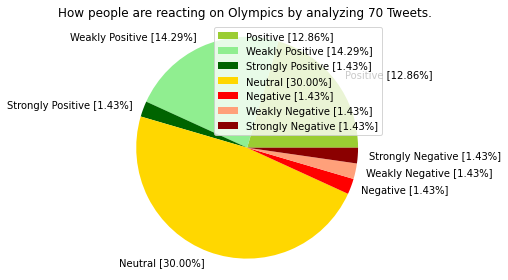

In [24]:
plt.pie(sizes, labels = labels, colors = colors)
plt.legend(labels, loc="best")
plt.title('How people are reacting on ' + searchTerm + ' by analyzing ' + str(NoOfTerms) + ' Tweets.')
plt.axis('equal')
plt.tight_layout()
plt.show()